
# 0. Necessary libraries

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium import Choropleth

# 1.Downloading Data

In [2]:
# Green Taxi Trip Records January 2022 
df_green_jan_2022 = pd.read_parquet(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\green_tripdata_2022-01.parquet")
# Green Taxi Trip Records August 2022
df_green_aug_2022 = pd.read_parquet(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\green_tripdata_2022-08.parquet")

In [3]:
# Join Green Taxi datasets
df_green_all = pd.concat([df_green_jan_2022, df_green_aug_2022])

In [4]:
# Yellow Taxi Trip Records January 2022 and 2023
df_yellow_jan_2022 = pd.read_parquet(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\yellow_tripdata_2022-01.parquet")
# Yellow Taxi Trip Records August 2022 and 2023
df_yellow_aug_2022 = pd.read_parquet(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\yellow_tripdata_2022-08.parquet")

In [5]:
# Join Yellow Taxi datasets
df_yellow_all = pd.concat([df_yellow_jan_2022, df_yellow_aug_2022])

In [6]:
# Read CSV file
taxi_zones = pd.read_csv(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\taxi_zone_lookup.csv")

In [7]:
#Read the taxi_zones file
taxi_zones_geo = gpd.read_file(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\taxi_zones\taxi_zones\taxi_zones.shp")

# 2.Data Visualization

In [8]:
print("Green Taxi Data:")
print(df_green_all.head())
print("\nYellow Taxi Data:")
print(df_yellow_all.head())

Green Taxi Data:
   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2022-01-01 00:14:21   2022-01-01 00:15:33                  N   
1         1  2022-01-01 00:20:55   2022-01-01 00:29:38                  N   
2         1  2022-01-01 00:57:02   2022-01-01 01:13:14                  N   
3         2  2022-01-01 00:07:42   2022-01-01 00:15:57                  N   
4         2  2022-01-01 00:07:50   2022-01-01 00:28:52                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            42            42              1.0           0.44   
1         1.0           116            41              1.0           2.10   
2         1.0            41           140              1.0           3.70   
3         1.0           181           181              1.0           1.69   
4         1.0            33           170              1.0           6.26   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount 

In [9]:
# DataFrame Information
print("\nGreen Taxi Data Info:")
print(df_green_all.info())
print("\nYellow Taxi Data Info:")
print(df_yellow_all.info())


Green Taxi Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 128424 entries, 0 to 65928
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               128424 non-null  int64         
 1   lpep_pickup_datetime   128424 non-null  datetime64[us]
 2   lpep_dropoff_datetime  128424 non-null  datetime64[us]
 3   store_and_fwd_flag     116228 non-null  object        
 4   RatecodeID             116228 non-null  float64       
 5   PULocationID           128424 non-null  int64         
 6   DOLocationID           128424 non-null  int64         
 7   passenger_count        116228 non-null  float64       
 8   trip_distance          128424 non-null  float64       
 9   fare_amount            128424 non-null  float64       
 10  extra                  128424 non-null  float64       
 11  mta_tax                128424 non-null  float64       
 12  tip_amount             1284

In [10]:
print(taxi_zones.head())

   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone


In [11]:
print(taxi_zones.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB
None


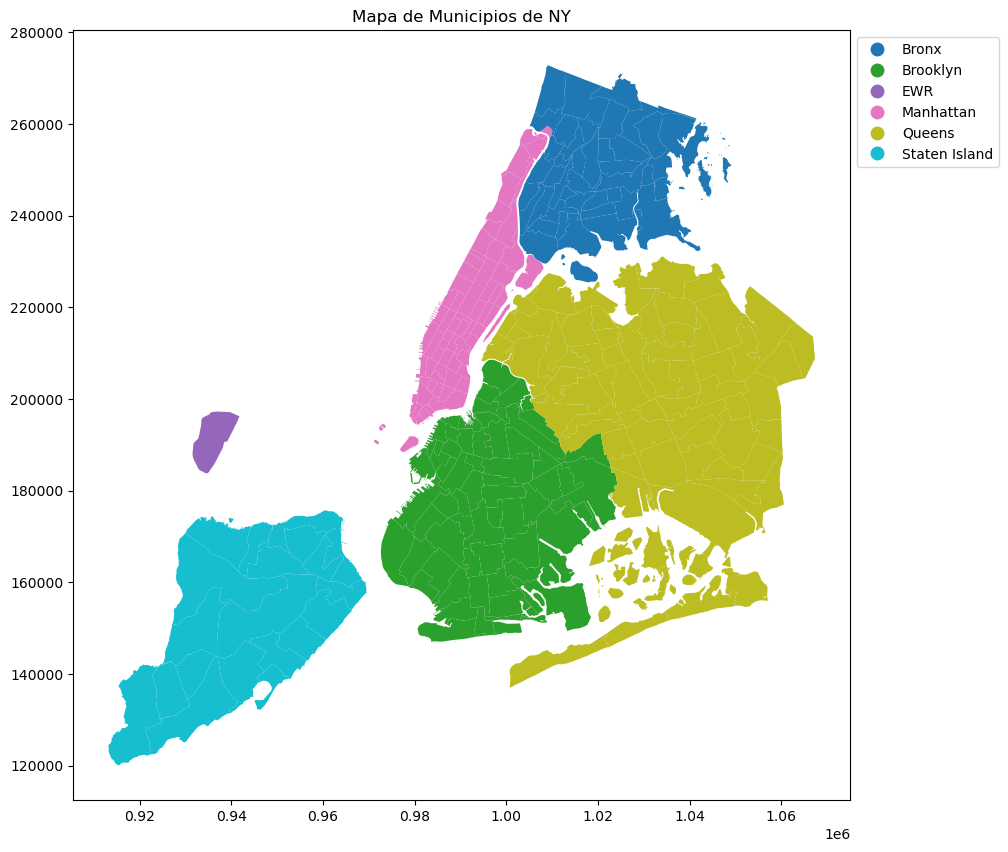

In [76]:
# NYC Bourgh 
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
taxi_zones_geo.plot(column='borough', ax=ax, legend=True,
                    legend_kwds={'bbox_to_anchor': (1, 1), 'loc': 'upper left'})
ax.set_title('Mapa de Municipios de NY')
plt.show()


In [73]:
print(taxi_zones.nunique)

<bound method DataFrame.nunique of      LocationID        Borough                     Zone service_zone
0             1            EWR           Newark Airport          EWR
1             2         Queens              Jamaica Bay    Boro Zone
2             3          Bronx  Allerton/Pelham Gardens    Boro Zone
3             4      Manhattan            Alphabet City  Yellow Zone
4             5  Staten Island            Arden Heights    Boro Zone
..          ...            ...                      ...          ...
260         261      Manhattan       World Trade Center  Yellow Zone
261         262      Manhattan           Yorkville East  Yellow Zone
262         263      Manhattan           Yorkville West  Yellow Zone
263         264        Unknown                      NaN          NaN
264         265            NaN           Outside of NYC          NaN

[265 rows x 4 columns]>


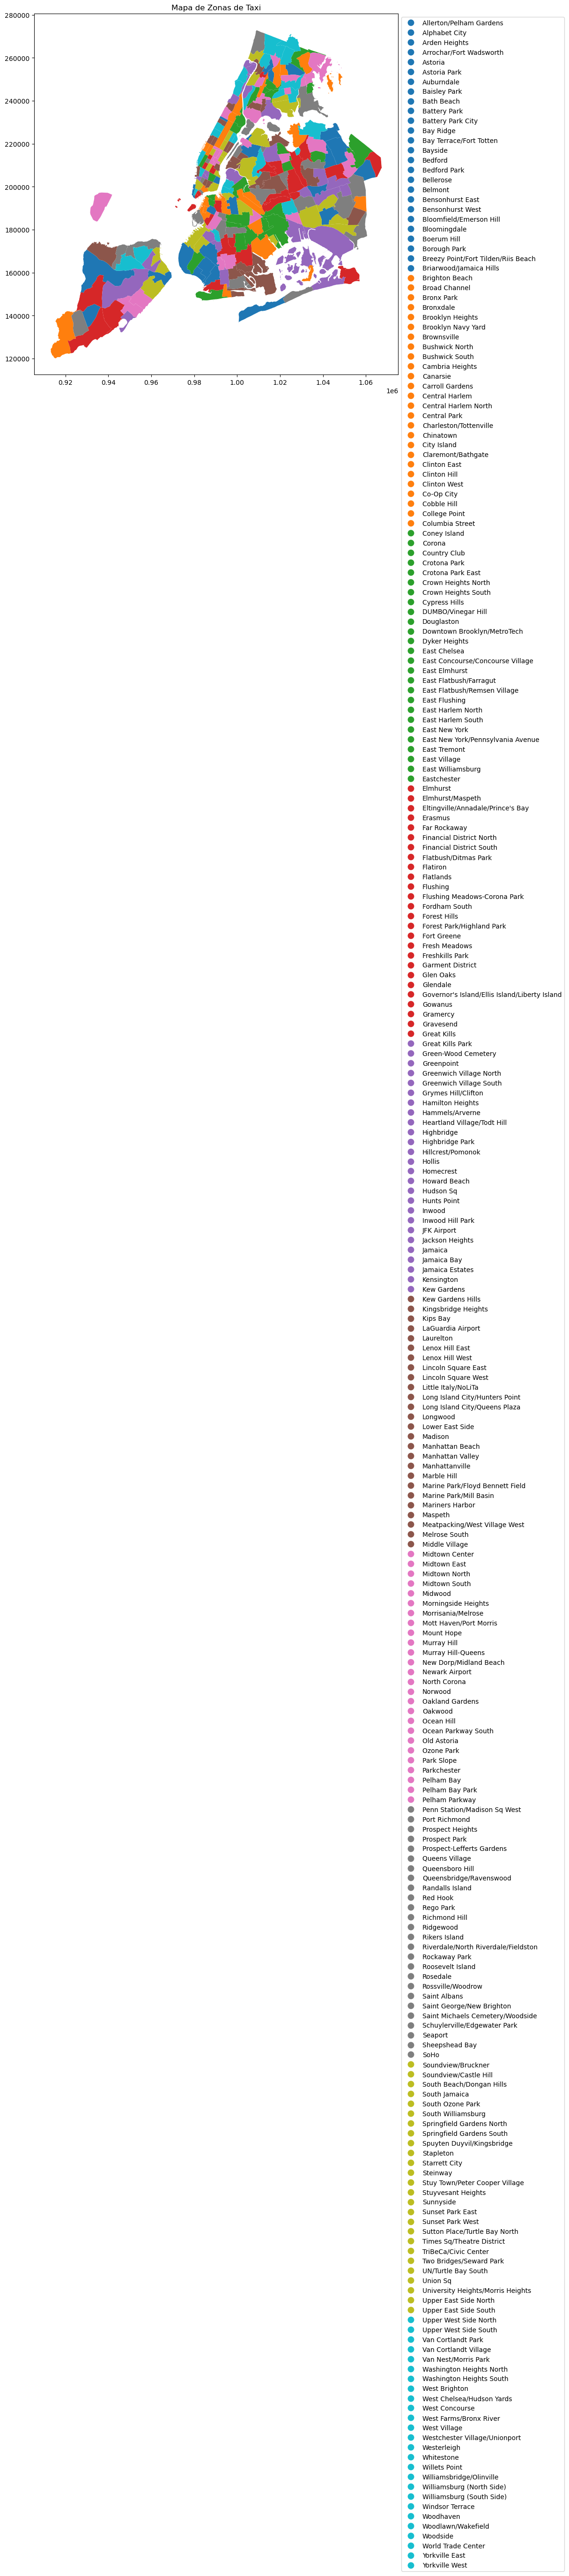

In [13]:
# NYC Zones 
taxi_zones_geo = gpd.read_file(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\taxi_zones\taxi_zones\taxi_zones.shp")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
taxi_zones_geo.plot(column='zone', ax=ax, legend=True,
                    legend_kwds={'bbox_to_anchor': (1, 1), 'loc': 'upper left'})
ax.set_title('Mapa de Zonas de Taxi')
plt.show()

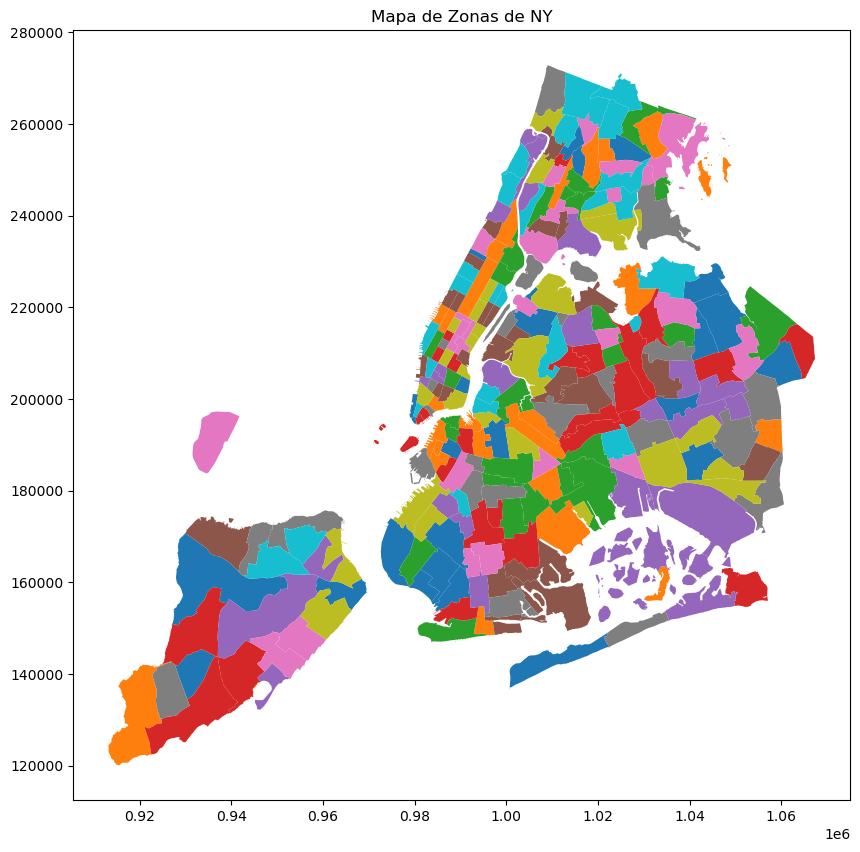

In [77]:
# NYC Zones 
taxi_zones_geo = gpd.read_file(r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\Data\taxi_zones\taxi_zones\taxi_zones.shp")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
taxi_zones_geo.plot(column='zone', ax=ax)
ax.set_title('Mapa de Zonas de NY')
plt.show()

## Data Dictionary - Green Taxis Trip Records

**VendorID:** A code indicating the LPEP provider that provided the record.
- **1** = Creative Mobile Technologies, LLC
- **2** = VeriFone Inc.

**lpep_pickup_datetime:** The date and time when the meter was engaged.

**lpep_dropoff_datetime:** The date and time when the meter was disengaged.

**Store_and_fwd_flag:** This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
- **Y** = store and forward trip
- **N** = not a store and forward trip

**RateCodeID:** The final rate code in effect at the end of the trip.
- **1** = Standard rate
- **2** = JFK
- **3** = Newark
- **4** = Nassau or Westchester
- **5** = Negotiated fare
- **6** = Group ride

**PULocationID:** TLC Taxi Zone in which the taximeter was engaged.

**DOLocationID:** TLC Taxi Zone in which the taximeter was disengaged.

**Passenger_count:** The number of passengers in the vehicle. This is a driver-entered value.

**Trip_distance:** The elapsed trip distance in miles reported by the meter

**Fare_amount:** The time-and-distance fare calculated by the meter.

**Extra:** Miscellaneous extras and surcharges. Currently, this only includes the MTA_tax $0.50 MTA tax that is automatically triggered based on the metered rate in use.

**MTA_tax:** $0.50 MTA tax that is automatically triggered based on the metered rate in use.

**Tip_amount:** This field is automatically populated for credit card tips. Cash tips are not included.

***Tolls_amount:** Total amount of all tolls paid in trip.

**Improvement_surcharge:** $0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.

**Total_amount:** The total amount charged to passengers. Does not include cash tips.

**Payment_type:** A numeric code signifying how the passenger paid for the trip.
- **1** = Credit card
- **2** = Cash
- **3** = No charge
- **4** = Dispute
- **5** = Unknown
- **6** = Voided trip

**Trip_type:** A code indicating whether the trip was a street-hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.
- **1** = Street-hail
- **2** = Dispat

**Congestion_Surcharge:** Total amount collected in trip for NYS congestion surcharge.ch
can be altered by the driver.
- **1** = Street-hail
- **2** = Dispatch


## Data Dictionary - Yellow Taxis Trip Records

**VendorID:** A code indicating the TPEP provider that provided the record.
- **1**: Creative Mobile Technologies, LLC
- **2**: VeriFone Inc.

**tpep_pickup_datetime:** The date and time when the meter was engaged.

**tpep_dropoff_datetime:** The date and time when the meter was disengaged.

**Passenger_count:** The number of passengers in the vehicle. This is a driver-entered value.

**Trip_distance:** The elapsed trip distance in miles reported by the meter.

**RateCodeID:** The final rate code in effect at the end of the trip.
- **1**: Standard rate
- **2**: JFK
- **3**: Newark
- **4**: Nassau or Westchester
- **5**: Negotiated fare
- **6**: Group ride

**Store_and_fwd_flag:** This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
- **Y**: store and forward trip
- **N**: not a store and forward trip

**PULocationID:** TLC Taxi Zone in which the taximeter was engaged.

**DOLocationID:** TLC Taxi Zone in which the taximeter was disengaged.

**Payment_type:** A numeric code signifying how the passenger paid for the trip.
- **1**: Credit card
- **2**: Cash
- **3**: No charge
- **4**: Dispute
- **5**: Unknown
- **6**: Voided trip

**Fare_amount:** The time-and-distance fare calculated by the meter.

**Extra:** Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

**MTA_tax:** $0.50 MTA tax that is automatically included in all fares.

**Tip_amount:** This field is automatically populated for credit card tips. Cash tips are not included.

**Improvement_surcharge:** $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.

**Tolls_amount:** Total amount of all tolls paid in trip.

**Total_amount:** The total amount charged to passengers. Does not include cash tips.

**Congestion_Surcharge:** Total amount collected in trip for NYS congestion surcharge.

**Airport_fee:** $1.25 for pick up only at LaGuardia and John F. Kennedy Airports.


# 3.Create One DataSet

The diffrence between the Green Taxi dataset and Yellow Taxi dataset is trip_type from the Green Taxi dataset and Airport_fee  from the Yellow Taxi datasetare only available in the Yellow Taxi.
We are going to create one dataset with all the trips. 

In [14]:
# Create a new column indicating taxi type
df_green_jan_2022['taxi_type'] = 'green'
df_green_aug_2022['taxi_type'] = 'green'

df_yellow_jan_2022['taxi_type'] = 'yellow'
df_yellow_aug_2022['taxi_type'] = 'yellow'

In [15]:
# Rename the pickup_datetime column and the dropoff_datetime column
df_green_jan_2022.rename(columns={'lpep_pickup_datetime': 'pickup_datetime', 'lpep_dropoff_datetime': 'dropoff_datetime'}, inplace=True)
df_green_aug_2022.rename(columns={'lpep_pickup_datetime': 'pickup_datetime', 'lpep_dropoff_datetime': 'dropoff_datetime'}, inplace=True)

df_yellow_jan_2022.rename(columns={'tpep_pickup_datetime': 'pickup_datetime', 'tpep_dropoff_datetime': 'dropoff_datetime'}, inplace=True)
df_yellow_aug_2022.rename(columns={'tpep_pickup_datetime': 'pickup_datetime', 'tpep_dropoff_datetime': 'dropoff_datetime'}, inplace=True)


In [16]:
# Select the columns to keep 
columns_to_keep = [
    'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'trip_distance',
    'PULocationID', 'DOLocationID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type',
    'fare_amount', 'extra', 'mta_tax', 'improvement_surcharge', 'tip_amount',
    'tolls_amount', 'total_amount', 'congestion_surcharge' , 'taxi_type'
]

df_green_jan_2022 = df_green_jan_2022[columns_to_keep]
df_green_aug_2022 = df_green_aug_2022[columns_to_keep]

df_yellow_jan_2022 = df_yellow_jan_2022[columns_to_keep]
df_yellow_aug_2022 = df_yellow_aug_2022[columns_to_keep]

In [17]:
# Combinar los DataFrames en uno solo
df_all = pd.concat([
    df_green_jan_2022, df_green_aug_2022, 
    df_yellow_jan_2022, df_yellow_aug_2022, 
], ignore_index=True)

# Mostrar las primeras filas del DataFrame combinado
print(df_all.head())


      pickup_datetime    dropoff_datetime  passenger_count  trip_distance  \
0 2022-01-01 00:14:21 2022-01-01 00:15:33              1.0           0.44   
1 2022-01-01 00:20:55 2022-01-01 00:29:38              1.0           2.10   
2 2022-01-01 00:57:02 2022-01-01 01:13:14              1.0           3.70   
3 2022-01-01 00:07:42 2022-01-01 00:15:57              1.0           1.69   
4 2022-01-01 00:07:50 2022-01-01 00:28:52              1.0           6.26   

   PULocationID  DOLocationID  RatecodeID store_and_fwd_flag  payment_type  \
0            42            42         1.0                  N           2.0   
1           116            41         1.0                  N           2.0   
2            41           140         1.0                  N           1.0   
3           181           181         1.0                  N           2.0   
4            33           170         1.0                  N           1.0   

   fare_amount  extra  mta_tax  improvement_surcharge  tip_amount  \

# 4.Data Check

## Distance

There could be some errors in the data we have dowloaded, we are going to check some information in order to have a good judgement of the conclusions we are going to obtein.

In [18]:
df_all['trip_distance'].describe().to_frame()

,trip_distance
count,5.745032e+06
mean,6.906291e+00
std,6.774008e+02
min,0.000000e+00
25%,1.100000e+00
50%,1.850000e+00
75%,3.450000e+00
max,3.305787e+05


There seems to be some outliers:

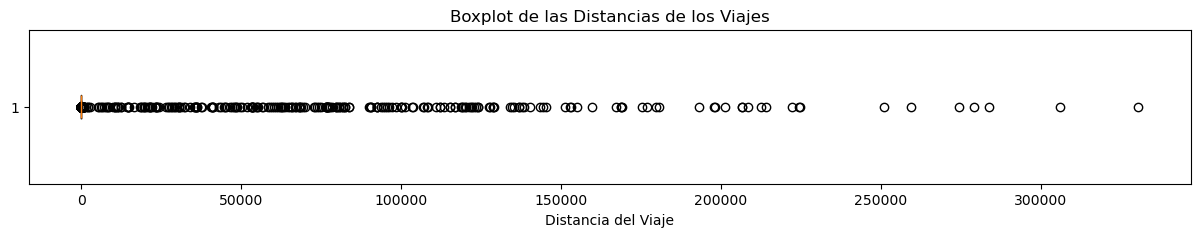

In [19]:
plt.figure(figsize=(15, 2))
plt.boxplot(df_all['trip_distance'], vert=False)
plt.title('Boxplot de las Distancias de los Viajes')
plt.xlabel('Distancia del Viaje')
plt.show()

In [20]:
percentile_99 = df_all['trip_distance'].quantile(0.99)
percentile_999 = df_all['trip_distance'].quantile(0.999)

print(f"99% Percentile: {percentile_99}")
print(f"99.9% Percentile: {percentile_999}")

99% Percentile: 20.1
99.9% Percentile: 30.16


In [21]:
# Filter data to eliminate outliers above the 99.9% percentile:
df_filtered = df_all[df_all['trip_distance'] <= percentile_999]

print(df_filtered['trip_distance'].describe())

count    5.739290e+06
mean     3.368527e+00
std      4.222323e+00
min      0.000000e+00
25%      1.100000e+00
50%      1.850000e+00
75%      3.430000e+00
max      3.016000e+01
Name: trip_distance, dtype: float64


In [22]:
# Remove rows where trip_distance is 0.00, because they are not going to be usefull in the futures, since we are interested in trip distances
df_filtered = df_filtered[df_filtered["trip_distance"] != 0.00]

# Verify the changes
print("Number of rows after removing trip_distance=0.00:", df_filtered.shape[0])

Number of rows after removing trip_distance=0.00: 5652823


## Zones

In [23]:
# Obtain unique locations from each dataset
unique_zones_csv = set(taxi_zones["LocationID"].unique())
unique_zones_shp = set(taxi_zones_geo["OBJECTID"].unique())
unique_zones_df_PU = set(df_filtered["PULocationID"].unique())
unique_zones_df_DO = set(df_filtered["DOLocationID"].unique())

# Verify sizes
print("Size of unique_zones_csv:", len(unique_zones_csv))
print("Size of unique_zones_shp:", len(unique_zones_shp))
print("Size of unique_zones_df_PU:", len(unique_zones_df_PU))
print("Size of unique_zones_df_DO:", len(unique_zones_df_DO))

Size of unique_zones_csv: 265
Size of unique_zones_shp: 263
Size of unique_zones_df_PU: 262
Size of unique_zones_df_DO: 262


In [24]:
# Combine PU and DO zones
unique_zones_df = unique_zones_df_PU.union(unique_zones_df_DO)
print("Size of unique_zones_df (PU + DO):", len(unique_zones_df))

Size of unique_zones_df (PU + DO): 263


In [25]:
# Identify differences
diff_csv_shp = unique_zones_csv.symmetric_difference(unique_zones_shp)
diff_csv_df = unique_zones_csv.symmetric_difference(unique_zones_df)
diff_shp_df = unique_zones_shp.symmetric_difference(unique_zones_df)

print("Differences between csv and shp:", diff_csv_shp)
print("Differences between csv and df (PU + DO):", diff_csv_df)
print("Differences between shp and df (PU + DO):", diff_shp_df)

Differences between csv and shp: {264, 265}
Differences between csv and df (PU + DO): {103, 104}
Differences between shp and df (PU + DO): {103, 104, 264, 265}


This means that:
- In df (PU + DO) there are no trips in and from 103, 104 but they exist in shp and csv. 
- In shp it does not exist 264, 265 but in csv and df they do.

In [26]:
# Identify common zones in all datasets
common_zones = unique_zones_csv.intersection(unique_zones_shp)
print("Number of common zones in all datasets:", len(common_zones))

Number of common zones in all datasets: 263


In [27]:
# Filtrar el DataFrame para los LocationID 264 y 265
df_filtered_PU_264_265 = df_filtered[df_filtered["PULocationID"].isin([264, 265])]


# Number of trips Pick up outside NY
df_filtered_PU_264_265 = df_filtered[df_filtered["PULocationID"].isin([264, 265])]
trip_counts_PU = df_filtered_PU_264_265["PULocationID"].value_counts()
total_trips_PU = trip_counts_PU.sum()

#Number of trips drop off outside NY
df_filtered_DO_264_265 = df_filtered[df_filtered["DOLocationID"].isin([264, 265])]
trip_counts_DO = df_filtered_DO_264_265["PULocationID"].value_counts()
total_trips_DO = trip_counts_DO.sum()

#Total number of trips
trip_counts_per_location = df_filtered["PULocationID"].value_counts()
total_trips = trip_counts_per_location.sum()

print(f"Percentage of trips Pick up outside NY: {total_trips_PU/total_trips}")
print(f"Percentage of trips drop off outside NY: {total_trips_DO/total_trips}")

Percentage of trips Pick up outside NY: 0.012995453775927533
Percentage of trips drop off outside NY: 0.008601719884029626


In [28]:
df_filtered[df_filtered["DOLocationID"]==110]

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,improvement_surcharge,tip_amount,tolls_amount,total_amount,congestion_surcharge,taxi_type
3113208,2022-08-06 00:35:40,2022-08-06 01:27:07,1.0,27.66,132,110,1.0,N,2.0,75.0,0.5,0.5,0.3,0.0,6.55,84.1,0.0,yellow


Since the percentaje is really low, we are going to eliminate the trips made out of NY

In [29]:
# Eliminate the trips with LocationID 264 and 265 for both Pick Up and Drop Off
df_filtered = df_filtered[
    ~df_filtered["PULocationID"].isin([264, 265]) &
    ~df_filtered["DOLocationID"].isin([264, 265])
]

# Print the size of the DataFrame after elimination
print(f"Total trips after filtering: {df_filtered.shape[0]}")

Total trips after filtering: 5556362


## Final decisions

In [ ]:
file_path_csv = r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\df_filtered.csv"

df_filtered.to_csv(file_path_csv, index=False)

print(f"Archivo guardado en: {file_path_csv}")

In [ ]:
taxi_data_cols = df_filtered[['PULocationID', 'DOLocationID' , 'pickup_datetime', 'trip_distance']]

file_path_csv = r"C:\Users\Paula\OneDrive\Matematicas y estadistia-UCM\Matematicas y estadistica\TFG\Base de datos\Data (1)\taxi_data_cols.csv"

taxi_data_cols.to_csv(file_path_csv, index=False)

print(f"Archivo guardado en: {file_path_csv}")

# 5.Route and Demand Data Analysis

## Trip distance distribution by day of the week
Break down the trip distance distribution for each day of week

In [ ]:
# Convert the tpep_pickup_datetime column to datetime if it's not already
df_filtered.loc['pickup_datetime'] = pd.to_datetime(df_filtered['pickup_datetime'])

# Extract the day of the week
df_filtered.loc[:, 'pickup_day_of_week'] = df_filtered['pickup_datetime'].dt.day_name()

# Calculate the average trip distance by day of the week
avg_trip_distance_by_day = df_filtered.groupby('pickup_day_of_week')['trip_distance'].mean().reset_index()

# Order the days of the week correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_trip_distance_by_day['pickup_day_of_week'] = pd.Categorical(avg_trip_distance_by_day['pickup_day_of_week'], categories=days_order, ordered=True)
avg_trip_distance_by_day = avg_trip_distance_by_day.sort_values('pickup_day_of_week')

# Plot the trip distance distribution
plt.bar(avg_trip_distance_by_day['pickup_day_of_week'], avg_trip_distance_by_day['trip_distance'])
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Distance, miles')
plt.title('Trip Distance Distribution by Day of the Week')
plt.show()

## Trip distance distribution by hour of the day
Break down the trip distance distribution for each hour of the day

In [ ]:
# Convert the pickup_datetime column to datetime if it's not already
df_filtered['pickup_datetime'] = pd.to_datetime(df_filtered['pickup_datetime'])

# Extract the hour of the day
df_filtered['pickup_hour_of_day'] = df_filtered['pickup_datetime'].dt.hour

# Calculate the average trip distance by hour of the day
avg_trip_distance_by_hour = df_filtered.groupby('pickup_hour_of_day')['trip_distance'].mean().reset_index()

# Plot the trip distance distribution
plt.bar(avg_trip_distance_by_hour['pickup_hour_of_day'], avg_trip_distance_by_hour['trip_distance'])
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Distance (miles)')
plt.title('Trip Distance Distribution by Hour of the Day')
plt.show()


## Demand distribution by Day of the Week

In [ ]:
# Convert the pickup_datetime column to datetime if it's not already
df_filtered['pickup_datetime'] = pd.to_datetime(df_filtered['pickup_datetime'])

# Extract the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
df_filtered['pickup_day_of_week'] = df_filtered['pickup_datetime'].dt.dayofweek

# Calculate the demand distribution by day of the week (i.e., count of trips)
demand_distribution_by_day = df_filtered.groupby('pickup_day_of_week').size().reset_index(name='trip_count')

# Map the day of week numbers to their names for better readability
days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
demand_distribution_by_day['day_of_week'] = demand_distribution_by_day['pickup_day_of_week'].map(days_of_week)

# Plot the demand distribution
plt.bar(demand_distribution_by_day['day_of_week'], demand_distribution_by_day['trip_count'])
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Demand Distribution by Day of the Week')
plt.show()


## Demand distribution by Hour of the day

In [ ]:
# Convert the pickup_datetime column to datetime if it's not already
df_filtered['pickup_datetime'] = pd.to_datetime(df_filtered['pickup_datetime'])

# Extract the hour of the day
df_filtered['pickup_hour_of_day'] = df_filtered['pickup_datetime'].dt.hour

# Calculate the demand distribution by hour of the day (i.e., count of trips)
demand_distribution_by_hour = df_filtered.groupby('pickup_hour_of_day').size().reset_index(name='trip_count')

# Plot the demand distribution
plt.bar(demand_distribution_by_hour['pickup_hour_of_day'], demand_distribution_by_hour['trip_count'])
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Demand Distribution by Hour of the Day')
plt.show()


## January vs August

### Number of trips

In [ ]:
# Filter the data for January and August
january_trips = df_filtered[df_filtered['pickup_datetime'].dt.month == 1]
august_trips = df_filtered[df_filtered['pickup_datetime'].dt.month == 8]

# Count the number of trips in each month
january_trip_count = january_trips.shape[0]
august_trip_count = august_trips.shape[0]

# Print the results
print(f"Number of trips in January: {january_trip_count}")
print(f"Number of trips in August: {august_trip_count}")
print(f"Difference between the number of trips in January and in August:{august_trip_count-january_trip_count}")

In [ ]:
# Plotting the results
months = ['January', 'August']
trip_counts = [january_trip_count, august_trip_count]

plt.figure(figsize=(10, 6))
plt.bar(months, trip_counts, color=['blue', 'orange'])
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of Trips in January and August')
plt.show()

### Number of Taxi Pickups by Day of the Week and Hour of the Day

In [ ]:
# Convert the pickup_datetime column to datetime if it's not already
df_filtered.loc[:, 'pickup_datetime'] = pd.to_datetime(df_filtered['pickup_datetime'])

# Extract the month, day of the week, and hour of the day
df_filtered.loc[:, 'month'] = df_filtered['pickup_datetime'].dt.month
df_filtered.loc[:, 'day_of_week'] = df_filtered['pickup_datetime'].dt.dayofweek + 1  # +1 to match DAYOFWEEK function (1 = Sunday)
df_filtered.loc[:, 'hour_of_day'] = df_filtered['pickup_datetime'].dt.hour

# Filter for January (month = 1) and August (month = 8)
filtered_data = df_filtered[df_filtered['month'].isin([1, 8])]

# Compute the number of pickups by month, day of the week, and hour of the day
pickup_counts = filtered_data.groupby(['month', 'day_of_week', 'hour_of_day']).size().reset_index(name='pickup_count')

# Pivot the data to create a table indexed by hour of the day and columns as days of the week, for each month
pickup_pivot_january = pickup_counts[pickup_counts['month'] == 1].pivot(index='hour_of_day', columns='day_of_week', values='pickup_count')
pickup_pivot_august = pickup_counts[pickup_counts['month'] == 8].pivot(index='hour_of_day', columns='day_of_week', values='pickup_count')

# Plotting the time series for January
fig, ax = plt.subplots(figsize=(12, 6))
pickup_pivot_january.plot(ax=ax, cmap='coolwarm')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Pickups')
ax.set_title('Number of Yellow Taxi by Day of the Week and Hour of the Day (January)')
ax.legend(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

# Plotting the time series for August
fig, ax = plt.subplots(figsize=(12, 6))
pickup_pivot_august.plot(ax=ax, cmap='coolwarm')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Pickups')
ax.set_title('Number of Taxi Pickups by Day of the Week and Hour of the Day (August)')
ax.legend(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

In [ ]:
# Display the pivot tables for January and August
print("Pickup Counts - January")
print(pickup_pivot_january)

print("\nPickup Counts - August")
print(pickup_pivot_august)

In [ ]:
# Calculate the difference and ratio between August and January pickups
pickup_difference = pickup_pivot_august - pickup_pivot_january
pickup_ratio = pickup_pivot_august / (pickup_pivot_january.replace(0, 1))  # Avoid division by zero

print("\nDifference in Pickups (August - January)")
print(pickup_difference)

print("\nRatio of Pickups (August / January)")
print(pickup_ratio)

## Locations

In [ ]:
# Calculate the number of distinct pickup locations
distinct_pickup_locations = df_filtered['PULocationID'].nunique()

# Calculate the number of distinct dropoff locations
distinct_dropoff_locations = df_filtered['DOLocationID'].nunique()

print("Number of distinct pickup locations:", distinct_pickup_locations)
print("Number of distinct dropoff locations:", distinct_dropoff_locations)

In [ ]:
taxi_zones.nunique()

In [ ]:
# Convertir las columnas de LocationID a conjuntos
pickup_locations = set(df_filtered['PULocationID'].unique())
dropoff_locations = set(df_filtered['DOLocationID'].unique())
all_taxi_locations = set(taxi_zones['LocationID'].unique())

# Obtener todas las locations usadas en df_filtered
all_used_locations = pickup_locations.union(dropoff_locations)

# Encontrar las LocationIDs que están en taxi_zones pero no en df_filtered
locations_not_in_filtered = all_taxi_locations - all_used_locations

# Convertir a lista y ordenar (opcional)
locations_not_in_filtered = sorted(list(locations_not_in_filtered))

# Seleccionar las filas de taxi_zones para las primeras 3 LocationIDs que no están en df_filtered
locations_not_in_filtered_df = taxi_zones[taxi_zones['LocationID'].isin(locations_not_in_filtered)]

# Mostrar las filas seleccionadas
print(locations_not_in_filtered_df)

Seems that Governor's Island/Ellis Island/Liberty Island are the only locations that are not inthe Taxis dataset

In [ ]:
# Define the LocationIDs for Governor's Island, Ellis Island, and Liberty Island
location_ids = [103, 104]  # Make sure these are the correct LocationIDs

# Filter the GeoDataFrame to highlight the specific zones
highlighted_zones = taxi_zones_geo[taxi_zones_geo['LocationID'].isin(location_ids)]

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot all zones in light grey
taxi_zones_geo.plot(ax=ax, color='lightgrey')

# Highlight specific zones in red
highlighted_zones.plot(ax=ax, color='red')

# Add title
ax.set_title("Governor's Island, Ellis Island, and Liberty Island ")

# Show the plot
plt.show()

## Number of Pickups by Zone

In [ ]:
# Merge df_filtered with taxi_zones_geo to get the zone information using PULocationID
df_filtered_merged = df_filtered.merge(taxi_zones_geo[['OBJECTID', 'zone']], left_on='PULocationID', right_on='OBJECTID', how='left')

# Aggregate the number of pickups by zone
pickup_by_zone = df_filtered_merged.groupby('zone').size().reset_index(name='pickup_count')

# Print the aggregated data
print(pickup_by_zone)

In [ ]:
top_5_zones = pickup_by_zone.nlargest(5, 'pickup_count')
print("Top 5 Zones by Pickups:")
print(top_5_zones)

fig, ax = plt.subplots(figsize=(10, 6))
top_5_zones.plot(kind='bar', x='zone', y='pickup_count', ax=ax, color='blue', legend=False)
ax.set_xlabel('Zone')
ax.set_ylabel('Number of Pickups')
ax.set_title('Top 5 of Taxi Pickups by Zone')
plt.xticks(rotation=90)
plt.show()

In [ ]:
bottom_5_zones = pickup_by_zone.nsmallest(5, 'pickup_count')
print("Bottom 5 Zones by Pickups:")
print(bottom_5_zones)

fig, ax = plt.subplots(figsize=(10, 6))
bottom_5_zones.plot(kind='bar', x='zone', y='pickup_count', ax=ax, color='yellow', legend=False)
ax.set_xlabel('Zone')
ax.set_ylabel('Number of Pickups')
ax.set_title('Top 5 of Taxi Pickups by Zone')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Merge df_filtered with taxi_zones_geo to get the zone information
df_filtered_merged = df_filtered.merge(taxi_zones_geo[['OBJECTID', 'zone', 'geometry']], left_on='PULocationID', right_on='OBJECTID', how='left')


# Ensure taxi_zones_geo has a 'zone' column for merging
taxi_zones_geo = taxi_zones_geo.dissolve(by='zone', aggfunc='sum')

# Merge the aggregated data with the GeoDataFrame
taxi_zones_geo = taxi_zones_geo.reset_index().merge(pickup_by_zone, on='zone')

# Create a folium map centered on New York City
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Create a Choropleth map
Choropleth(
    geo_data=taxi_zones_geo,
    name='choropleth',
    data=taxi_zones_geo,
    columns=['zone', 'pickup_count'],
    key_on='feature.properties.zone',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Pickups by zone'
).add_to(m)

# Add zone boundaries for better visualization
for _, r in taxi_zones_geo.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {'color': 'black', 'weight': 1})
    folium.Popup(r['zone'] + ': ' + str(r['pickup_count'])).add_to(geo_j)
    geo_j.add_to(m)

# Save the map to an HTML file
m.save('pickup_by_zone.html')

# Display the map in Jupyter Notebook 
m